# Iris Data Analysis

## Introduction

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository. It includes three iris species that are Iris-setosa, Iris-versicolor and Iris-virginica with 50 samples each, as well as some properties about each flower.


**Research Work**<br>
To classify the species of the iris flower based on sepal and petal length/width.

**Hypothesis**

**$H_{0}$:-** There is no statistical relationship between the petal length and petal width of the iris flowers.<br>
**$H_{1}$:-** There is statistical relationship between the petal length and petal width of the iris flowers.

**Assumptions**
+ Dependent variables should be categorical, binary or ordinal
+ Linearity- observations should be independent
+ Little or no multicollinearity among the independent variables
+ Influential Values such as extreme outliers 

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import statistics as s
import scipy.stats as ss
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#ignoring the warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
#importing the dataset
data = pd.read_csv("C:/Users/apoorv.srivastava/Downloads/datasets 2/datasets/Iris/iris.data.txt", sep=',')

In [20]:
#Printing out the column/variable names
print(data.columns.values)

['SepalLength' 'SepalWidth' 'PetalLength' 'PetalWidth' 'Species']


In [4]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
#proving hypothesis
ttest,pVal = ss.ttest_ind(data.PetalLength, data.PetalWidth)
print("pValue = ",pVal)
if pVal < 0.05:
    print("Rejecting Null Hypothesis and Accepting Alternative Hyposthesis")
else:
    print("Accepting Null Hypothesis and Rejecting Alternative Hypothesis")

pValue 3.493977734229762e-43
Rejecting Null Hypothesis and Accepting Alternative Hyposthesis


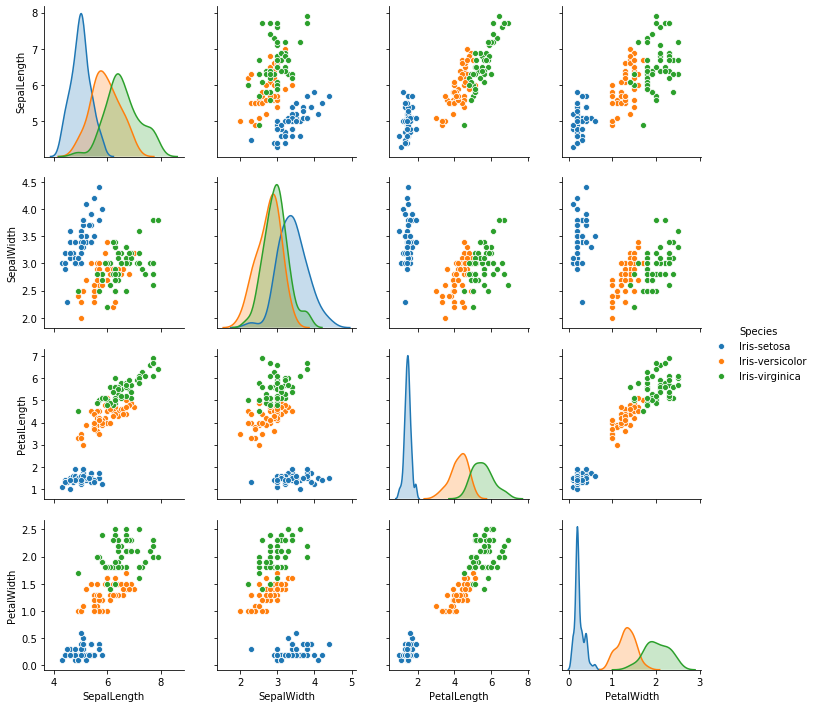

In [65]:
#checking the linearity assumption by plotting scatterplot
sns.pairplot(data, hue = 'Species');

**Conclusion-1**<br>
As the pairplot depict there is no linearity between the sepal length and sepal width but there is linearity between petal length and petal width. So, we will move further for checking all the assumptions

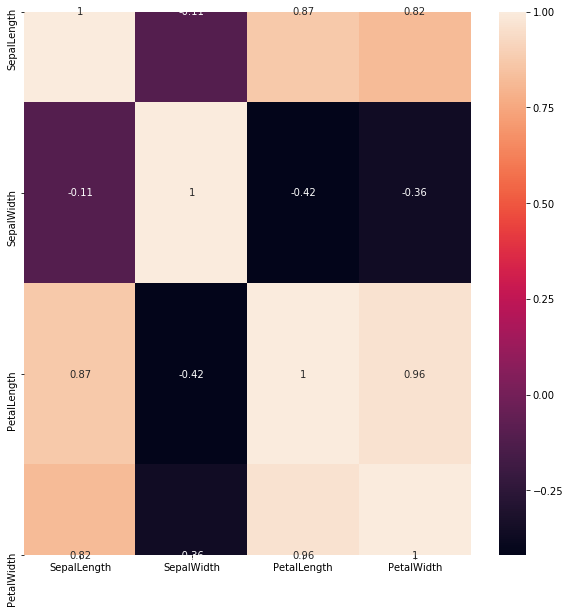

In [21]:
#checking multicollinearity among the independent variables by plotting heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot= True);

In [53]:
#finding out the correlation
data.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


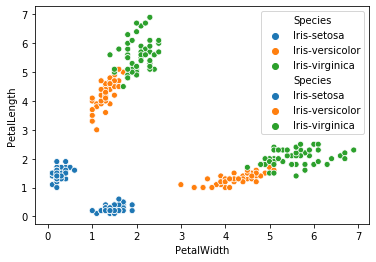

In [157]:
#plotting scatterplot for the two variables that are 'Petal Length and Petal Width'
sns.scatterplot(x = 'PetalLength', y = 'PetalWidth', data=data, hue= 'Species');
#sns.scatterplot(x = 'PetalWidth', y = 'PetalLength', data=data, hue= 'Species');

**Conclusion-2**<br>
As the heatmap depict, scatterplot and the correlation data depict there are two variables that are highly correlated that are 'Petal Length' and "Petal Width'. So, its time to use Dimentionality Reduction i.e., PCA

In [89]:
#Scalerizing the features and the target variable
from sklearn.preprocessing import StandardScaler
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
x = data.loc[:, features].values
y = data.loc[:,['Species']].values
x = StandardScaler().fit_transform(x)

In [76]:
#plotting PCA to 2D graph
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalData = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

In [78]:
principalData.head()

,pca1,pca2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [109]:
#creating final dataset
finalIris = pd.concat([principalData, data[['Species']]], axis = 1)

In [110]:
finalIris.head()

,pca1,pca2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


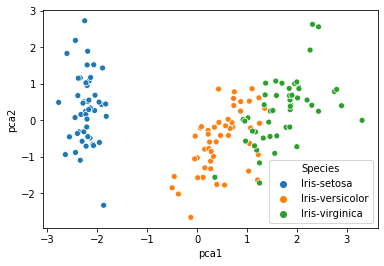

In [91]:
#visualizing the final dataset on scatterplot
#pca1 = finalIris['pca1']
#pca2 = finalIris['pca2']
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'Species', data = finalIris);

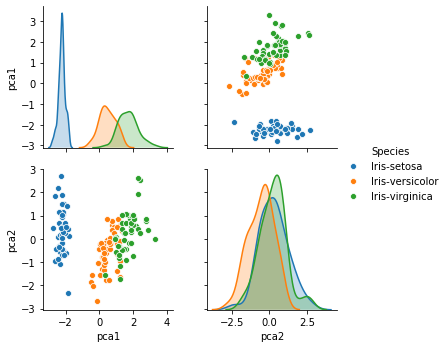

In [114]:
#plotting pairplot to examine the linearity
sns.pairplot(finalIris, hue = 'Species');

**Conclusion-3**<br>
Now there is no multicollinearity between the variables, so proceeding to the next step i.e., checking the influential values.

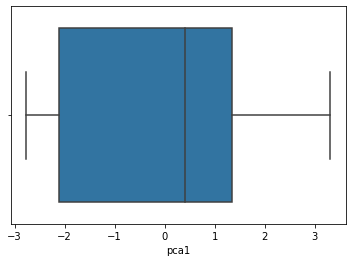

In [117]:
#plotting box plot for checking the Influential values
sns.boxplot(x = finalIris['pca1']);

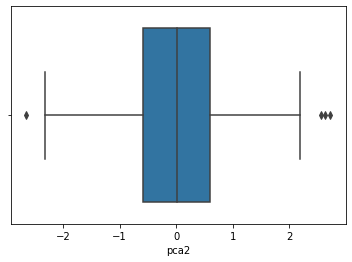

In [118]:
sns.boxplot(x = finalIris['pca2']);

**Conclusion-4**<br>
As depicted by boxplot of PCA2 variable there are some outliers, but they are very few in numbers so ignoring it. Moving ahead to buil model using logistic regression.

In [129]:
#splitting data into test and train set
train,test=train_test_split(finalIris,test_size=0.3)
train_X=train[['pca1', 'pca2']]
train_y=train.Species
test_X=test[['pca1', 'pca2']]
test_y=test.Species

In [147]:
#applying logistic regression on finalIris Dataset
import sklearn.metrics as metrics
lr=LogisticRegression()
lr.fit(train_X,train_y)
lrprediction=lr.predict(test_X)
accuracy=metrics.accuracy_score(lrprediction,test_y)
print("Accuracy {} ".format(accuracy*100))

Accuracy 91.11111111111111 


In [148]:
print(lrprediction)

['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor']


## **Final Conclusions**<br>
**Conclusion-1**<br>
+ Accuracy score of Logistic Regression Model is 91.11%.
+ Hypothesis Testing (t test) proved that there is statistical relationship between the two variables.
+ As we can see the two variables are highly correlated to we performed PCA on our data.

**Let's see which data are wrongly predicted**

In [153]:
#printing the wrong pretected
test_predData=test.copy()
test_predData['PredictedSpecies']=lrprediction
wrongpred=test_predData.loc[test['Species'] != lrprediction]
wrongpred

,pca1,pca2,Species,PredictedSpecies
72,1.227988,-0.940915,Iris-versicolor,Iris-virginica
75,0.873537,0.250709,Iris-versicolor,Iris-virginica
85,0.431783,0.855137,Iris-versicolor,Iris-virginica
113,1.253087,-1.167391,Iris-virginica,Iris-versicolor


**Conclusion-2**<br>
As we can see that there are 4 columns which are wrongly predicted

**Conclusion-3**<br>
+ Our logistic regression model gives the promising results.
+ Further we will check for some different algorithms such as Decision Tree and SVM.
+ After that we will get to know which model is giving the higher accuracy.